In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline


In [62]:
import pandas as pd
Stock = pd.read_csv('AAPL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

Open  High   Low  Close     Volume      SD20  Upper_Band  \
Date                                                                   
2005-10-17  6.66  6.69  6.50   6.60  154208600  0.169237    6.827473   
2005-10-18  6.57  6.66  6.44   6.45  152397000  0.168339    6.819677   
2005-10-19  6.43  6.78  6.32   6.78  252170800  0.180306    6.861112   
2005-10-20  6.72  6.97  6.71   6.93  339440500  0.202674    6.931847   
2005-10-21  7.02  7.03  6.83   6.87  199181500  0.216680    6.974860   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA10  QQQ_MA20  \
Date                                                ...                       
2005-10-17    6.150527          6.67          6.63  ...    33.692   33.9970   
2005-10-18    6.146323          6.60          6.67  ...    33.570   33.9525   
2005-10-19    6.139888          6.45          6.60  ...    33.562   33.9600   
2005-10-20    6.121153          6.78          6.45  ...    33.567   33.9455   
2005-10-21    6.108140          6.93          6.78  ...    33.586   33.9365   

            QQQ_MA50  SnP_Close  SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  \
Date                                                                           
2005-10-17   34.2690    1190.10    1186.57   1187.33    10348.10    10287.34   
2005-10-18   34.2466    1178.14    1190.10   1184.87    10285.26    10348.10   
2005-10-19   34.2330    1195.76    1178.14   1177.68    10414.13    10285.26   
2005-10-20   34.2190    1177.80    1195.76   1176.84    10281.10    10414.13   
2005-10-21   34.2034    1179.59    1177.80   1186.57    10215.22    10281.10   

            DJIA(t-5)  Close_forcast  
Date                                  
2005-10-17   10238.76           6.45  
2005-10-18   10253.17           6.78  
2005-10-19   10216.91           6.93  
2005-10-20   10216.59           6.87  
2005-10-21   10287.34           7.01  

[5 rows x 63 columns]

In [63]:
df_Stock.tail(5)

Open    High     Low   Close    Volume       SD20  Upper_Band  \
Date                                                                          
2020-08-07  452.82  454.70  441.17  444.45  49453300  27.954399  455.316298   
2020-08-10  450.40  455.10  440.00  450.91  53100900  29.847338  462.586675   
2020-08-11  447.88  449.93  436.43  437.50  46975600  30.576290  466.543079   
2020-08-12  441.99  453.10  441.19  452.04  41486200  32.050532  472.583564   
2020-08-13  457.72  464.17  455.71  460.04  52520500  33.532634  479.279768   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA10  QQQ_MA20  \
Date                                                ...                       
2020-08-07  343.498702        454.79        439.46  ...   266.054  263.4085   
2020-08-10  343.197325        444.45        454.79  ...   267.073  263.9970   
2020-08-11  344.237921        450.91        444.45  ...   267.911  264.2380   
2020-08-12  344.381436        437.50        450.91  ...   269.120  264.7860   
2020-08-13  345.149232        452.04        437.50  ...   270.255  265.4540   

            QQQ_MA50  SnP_Close  SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  \
Date                                                                           
2020-08-07  252.2098    3351.28    3349.16   3271.12    27433.48    27386.98   
2020-08-10  252.9570    3360.47    3351.28   3294.61    27791.44    27433.48   
2020-08-11  253.5878    3333.69    3360.47   3306.51    27686.91    27791.44   
2020-08-12  254.3206    3380.35    3333.69   3327.77    27976.84    27686.91   
2020-08-13  255.0446    3373.43    3380.35   3349.16    27896.72    27976.84   

            DJIA(t-5)  Close_forcast  
Date                                  
2020-08-07   26428.32         450.91  
2020-08-10   26664.40         437.50  
2020-08-11   26828.47         452.04  
2020-08-12   27201.52         460.04  
2020-08-13   27386.98         459.63  

[5 rows x 63 columns]

In [64]:
df_Stock.shape

(3732, 63)

In [65]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

### Plot Time Series chart for AAPL

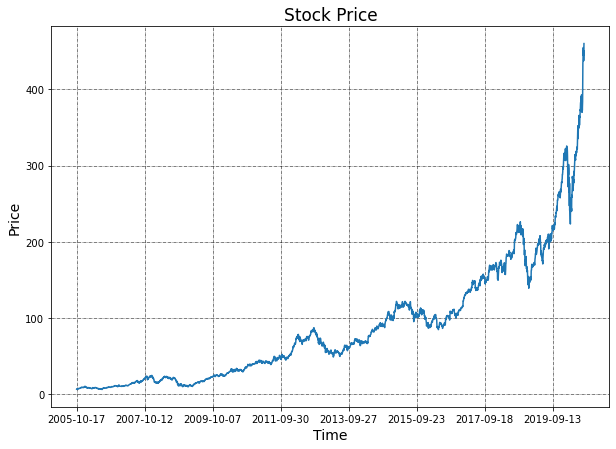

In [66]:
df_Stock['Close'].plot(figsize=(10, 7))


plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [67]:
df_Stock = df_Stock.drop(columns='Date_col')

In [68]:
df_Stock.head()

Open  High   Low  Close     Volume      SD20  Upper_Band  \
Date                                                                   
2005-10-17  6.66  6.69  6.50   6.60  154208600  0.169237    6.827473   
2005-10-18  6.57  6.66  6.44   6.45  152397000  0.168339    6.819677   
2005-10-19  6.43  6.78  6.32   6.78  252170800  0.180306    6.861112   
2005-10-20  6.72  6.97  6.71   6.93  339440500  0.202674    6.931847   
2005-10-21  7.02  7.03  6.83   6.87  199181500  0.216680    6.974860   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA10  QQQ_MA20  \
Date                                                ...                       
2005-10-17    6.150527          6.67          6.63  ...    33.692   33.9970   
2005-10-18    6.146323          6.60          6.67  ...    33.570   33.9525   
2005-10-19    6.139888          6.45          6.60  ...    33.562   33.9600   
2005-10-20    6.121153          6.78          6.45  ...    33.567   33.9455   
2005-10-21    6.108140          6.93          6.78  ...    33.586   33.9365   

            QQQ_MA50  SnP_Close  SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  \
Date                                                                           
2005-10-17   34.2690    1190.10    1186.57   1187.33    10348.10    10287.34   
2005-10-18   34.2466    1178.14    1190.10   1184.87    10285.26    10348.10   
2005-10-19   34.2330    1195.76    1178.14   1177.68    10414.13    10285.26   
2005-10-20   34.2190    1177.80    1195.76   1176.84    10281.10    10414.13   
2005-10-21   34.2034    1179.59    1177.80   1186.57    10215.22    10281.10   

            DJIA(t-5)  Close_forcast  
Date                                  
2005-10-17   10238.76           6.45  
2005-10-18   10253.17           6.78  
2005-10-19   10216.91           6.93  
2005-10-20   10216.59           6.87  
2005-10-21   10287.34           7.01  

[5 rows x 62 columns]

In [69]:
df_Stock.shape

(3732, 62)

In [70]:
0.88*3732

3284.16

In [36]:
X=df_Stock.iloc[:,df_Stock.columns!="Close_forecast"]

x.shape
3400 - X_train
300 - X_test
32 - X_val

In [38]:
df_Stock.corr()["Close_forcast"]

Open             0.999361
High             0.999460
Low              0.999449
Close            0.999523
Volume          -0.602507
                   ...   
SnP(t-5)         0.923440
DJIA_Close       0.918060
DJIA(t-1))       0.917832
DJIA(t-5)        0.916650
Close_forcast    1.000000
Name: Close_forcast, Length: 62, dtype: float64

In [40]:
model.intercept_

-83.36486403489825

In [ ]:
model.score()

### Test Train Set

Close_forecast is the column that we are trying to predict here which is the price for the next day. 

In [11]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [12]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)


### Prediction using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
X_train.shape

(3284, 61)

In [15]:
print('LR Coefficients: \n', model.coef_)
print('LR Intercept: \n', model.intercept_)

LR Coefficients: 
 [ 8.63710399e-03  1.86051850e-01  1.55487123e-01  1.12263754e+00
  1.27286772e-10  6.75250538e-03  1.40229154e-01  1.13219392e-01
  4.25628629e-02  8.96348259e-02  1.01914970e-01  5.94183661e-02
  7.95194339e-02  7.10399717e-02  2.71424976e-01  1.26724251e-01
  8.79333177e-02 -5.87980378e-03 -3.31643381e-01 -3.31643381e-01
 -3.31643381e-01 -3.31643381e-01 -3.31643381e-01  1.88650011e+00
 -1.27270720e+00 -1.65042232e-01 -4.36658345e-04  6.97518350e-13
 -5.07434324e-03  9.02936363e-03  5.78317697e-04  5.78317697e-04
 -5.57917990e-01 -2.02303729e-10  4.18931556e-11  1.69322437e-02
  1.61636704e-02 -1.75659579e-02  6.12165522e-03  2.15420349e-01
  1.13979655e-01 -2.41954673e-01  7.63050342e-02  3.73276597e-01
  2.22044605e-16 -5.60843984e-02  4.08788805e-02  5.13473864e-01
 -2.94431539e-02 -8.41335079e-02  5.10939132e-02 -8.14435799e-03
 -1.95035200e-02  5.67587252e-02  4.39707783e-02  1.29311738e-02
 -9.99967527e-03 -3.89778381e-03 -1.62174806e-03  1.44436894e-03
  2.83

### Evaluation

In [17]:
print("Performance (R^2): ", model.score(X_train, Y_train))

Performance (R^2):  0.9994516474373267


In [78]:
def get_mape(a, b): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    a, b = np.array(a), np.array(b)
    return np.mean(np.abs((a - b) / a)) * 100

In [ ]:

Y_pred = model.predict(X_test)

In [ ]:
metrics.r2_score(Y_test,Y_pred)

In [ ]:
print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_pred),2))



In [ ]:
metrics.r2_score(Y_test,Y_pred)

### Predict for the test dataset

In [71]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
df_comp=df.loc[3200:,["Date","Close_Forecast"]]

In [52]:
Y_val_pred=model.predict(X_val)

In [44]:
X_val.shape

(373, 61)

In [55]:
Y_val

Date
2018-11-01    202.30
2018-11-02    196.56
2018-11-05    198.68
2018-11-06    204.71
2018-11-07    204.00
               ...  
2020-04-22    273.79
2020-04-23    281.70
2020-04-24    281.90
2020-04-27    277.33
2020-04-28    286.44
Name: Close_forcast, Length: 373, dtype: float64

In [48]:
df_pred=pd.DataFrame(Y_val.values,columns=['Actual'],index=Y_val.index)

In [53]:
df_pred['Predicted']=Y_val_pred

In [58]:
df_pred=df_pred.reset_index()

<AxesSubplot:>

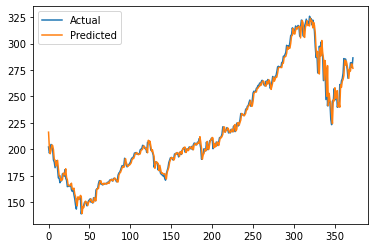

In [60]:
df_pred[['Actual', 'Predicted']].plot()

In [73]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred

df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

Date  Actual   Predicted
0   2018-11-01  202.30  216.289778
1   2018-11-02  196.56  201.470182
2   2018-11-05  198.68  195.948933
3   2018-11-06  204.71  199.043602
4   2018-11-07  204.00  204.193666
..         ...     ...         ...
368 2020-04-22  273.79  275.751755
369 2020-04-23  281.70  274.020243
370 2020-04-24  281.90  280.710044
371 2020-04-27  277.33  280.543603
372 2020-04-28  286.44  276.562124

[373 rows x 3 columns]

### Plot Predicted vs Actual Prices on Time Series plot

<AxesSubplot:>

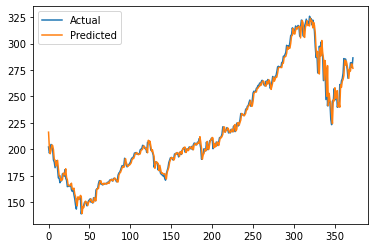

In [47]:
df_pred[['Actual', 'Predicted']].plot()

In [72]:

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [73]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [91]:

yf.pdr_override()
y_symbols = ['SCHAND.NS', 'TATAPOWER.NS', 'ITC.NS']
data = pdr.get_data_yahoo(y_symbols, start="2017-1-15", end="2023-1-15")

[*********************100%***********************]  3 of 3 completed


In [88]:
data.head()

Adj Close                                Close              \
                ITC.NS   SCHAND.NS TATAPOWER.NS      ITC.NS   SCHAND.NS   
Date                                                                      
2021-12-01  211.917419  108.900002   223.411880  221.899994  108.900002   
2021-12-02  215.307724  119.750000   224.602356  225.449997  119.750000   
2021-12-03  211.678665  115.800003   223.808716  221.649994  115.800003   
2021-12-06  208.097366  111.650002   219.096436  217.899994  111.650002   
2021-12-07  210.723648  112.400002   224.651962  220.649994  112.400002   

                               High                                  Low  \
           TATAPOWER.NS      ITC.NS   SCHAND.NS TATAPOWER.NS      ITC.NS   
Date                                                                       
2021-12-01   225.199997  223.300003  110.900002   227.300003  220.600006   
2021-12-02   226.399994  226.149994  119.750000   230.449997  221.300003   
2021-12-03   225.600006  226.199997  124.099998   228.300003  221.350006   
2021-12-06   220.850006  222.199997  118.650002   226.600006  217.500000   
2021-12-07   226.449997  221.949997  115.300003   227.750000  218.100006   

                                           Open                           \
             SCHAND.NS TATAPOWER.NS      ITC.NS   SCHAND.NS TATAPOWER.NS   
Date                                                                       
2021-12-01  105.849998   215.000000  222.000000  108.000000   220.000000   
2021-12-02  113.099998   221.199997  221.899994  115.550003   230.449997   
2021-12-03  115.000000   224.350006  225.000000  124.099998   226.800003   
2021-12-06  110.750000   220.100006  221.649994  116.000000   225.600006   
2021-12-07  111.500000   222.750000  218.899994  114.500000   224.000000   

              Volume                         
              ITC.NS SCHAND.NS TATAPOWER.NS  
Date                                         
2021-12-01  12995800     39746     67127202  
2021-12-02  15904846     79182     78572738  
2021-12-03  13794647    201002     48145736  
2021-12-06  13138355     62791     34399066  
2021-12-07   8903842     50790     36287629

In [85]:

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [86]:
# Read the data from Yahoo
df= pdr.get_data_yahoo('ITC.NS', '2020-01-01', '2022-12-31')
#df = df.dropna()


[*********************100%***********************]  1 of 1 completed


In [87]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-01  238.600006  238.600006  237.100006  238.100006  202.353333   
2020-01-02  238.199997  240.949997  238.100006  239.850006  203.840591   
2020-01-03  241.000000  241.000000  238.000000  238.500000  202.693268   
2020-01-06  237.500000  238.300003  235.000000  235.100006  199.803741   
2020-01-07  236.050003  237.899994  234.600006  235.350006  200.016205   

             Volume  
Date                 
2020-01-01  4208837  
2020-01-02  8402979  
2020-01-03  9284478  
2020-01-06  7636617  
2020-01-07  8416741

In [88]:
df.shape

(747, 6)

In [89]:
df = df.dropna()

In [90]:
df.shape[0]

747

In [91]:
df["Close"][0]

238.10000610351562

In [92]:
a=df.shape[0]
df["Close_Forecast"]=""
for i in range(a-1):
    df["Close_Forecast"][i]=df["Close"][i+1]
    

/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_33944/3635774604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close_Forecast"][i]=df["Close"][i+1]


In [32]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-26  326.500000  335.100006  325.500000  334.600006  329.405029   
2022-12-27  335.600006  336.399994  330.149994  333.149994  327.977539   
2022-12-28  332.850006  335.000000  331.500000  334.399994  329.208130   
2022-12-29  334.350006  335.750000  331.549988  335.350006  330.143372   
2022-12-30  335.399994  336.750000  330.500000  331.549988  326.402374   

             Volume Close_Forecast  
Date                                
2022-12-26  9566210     333.149994  
2022-12-27  6727343     334.399994  
2022-12-28  7737562     335.350006  
2022-12-29  8105359     331.549988  
2022-12-30  6960264

In [93]:
df=df.drop("2022-12-30")

In [34]:
df.shape

(746, 7)

In [35]:
df["Close_Forecast1"]=df["Close"].shift(-1)

In [36]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-01  238.600006  238.600006  237.100006  238.100006  202.353333   
2020-01-02  238.199997  240.949997  238.100006  239.850006  203.840622   
2020-01-03  241.000000  241.000000  238.000000  238.500000  202.693283   
2020-01-06  237.500000  238.300003  235.000000  235.100006  199.803726   
2020-01-07  236.050003  237.899994  234.600006  235.350006  200.016205   

             Volume Close_Forecast  Close_Forecast1  
Date                                                 
2020-01-01  4208837     239.850006       239.850006  
2020-01-02  8402979          238.5       238.500000  
2020-01-03  9284478     235.100006       235.100006  
2020-01-06  7636617     235.350006       235.350006  
2020-01-07  8416741     234.199997       234.199997

In [38]:
df["Close"].shape

(746,)

In [43]:
df.iloc[1:5,3]

Date
2020-01-02    239.850006
2020-01-03    238.500000
2020-01-06    235.100006
2020-01-07    235.350006
Name: Close, dtype: float64

In [44]:
df=df.reset_index()

In [45]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2020-01-01  238.600006  238.600006  237.100006  238.100006  202.353333   
1 2020-01-02  238.199997  240.949997  238.100006  239.850006  203.840622   
2 2020-01-03  241.000000  241.000000  238.000000  238.500000  202.693283   
3 2020-01-06  237.500000  238.300003  235.000000  235.100006  199.803726   
4 2020-01-07  236.050003  237.899994  234.600006  235.350006  200.016205   

    Volume Close_Forecast  Close_Forecast1  
0  4208837     239.850006       239.850006  
1  8402979          238.5       238.500000  
2  9284478     235.100006       235.100006  
3  7636617     235.350006       235.350006  
4  8416741     234.199997       234.199997

In [ ]:
# create a new column high - low
#craete a new column close - open
#create a new column close/adj_close

In [94]:
df["diff1"]=df["High"]-df["Low"]
df["diff2"]=df["Close"]-df["Open"]
df["ratio1"]=df["Close"]/df["Adj Close"]

In [50]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2020-01-01  238.600006  238.600006  237.100006  238.100006  202.353333   
1 2020-01-02  238.199997  240.949997  238.100006  239.850006  203.840622   
2 2020-01-03  241.000000  241.000000  238.000000  238.500000  202.693283   
3 2020-01-06  237.500000  238.300003  235.000000  235.100006  199.803726   
4 2020-01-07  236.050003  237.899994  234.600006  235.350006  200.016205   

    Volume Close_Forecast  Close_Forecast1     diff1     diff2    ratio1  
0  4208837     239.850006       239.850006  1.500000 -0.500000  1.176655  
1  8402979          238.5       238.500000  2.849991  1.650009  1.176655  
2  9284478     235.100006       235.100006  3.000000 -2.500000  1.176655  
3  7636617     235.350006       235.350006  3.300003 -2.399994  1.176655  
4  8416741     234.199997       234.199997  3.299988 -0.699997  1.176655

In [51]:
del df["Close_Forecast1"]

In [52]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2020-01-01  238.600006  238.600006  237.100006  238.100006  202.353333   
1 2020-01-02  238.199997  240.949997  238.100006  239.850006  203.840622   
2 2020-01-03  241.000000  241.000000  238.000000  238.500000  202.693283   
3 2020-01-06  237.500000  238.300003  235.000000  235.100006  199.803726   
4 2020-01-07  236.050003  237.899994  234.600006  235.350006  200.016205   

    Volume Close_Forecast     diff1     diff2    ratio1  
0  4208837     239.850006  1.500000 -0.500000  1.176655  
1  8402979          238.5  2.849991  1.650009  1.176655  
2  9284478     235.100006  3.000000 -2.500000  1.176655  
3  7636617     235.350006  3.300003 -2.399994  1.176655  
4  8416741     234.199997  3.299988 -0.699997  1.176655

In [56]:
df.dtypes

Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                     int64
Close_Forecast            object
diff1                    float64
diff2                    float64
ratio1                   float64
dtype: object

In [95]:
df["Close_Forecast"]=df["Close_Forecast"].astype(float)

In [96]:
df.corr()["Close_Forecast"]

Open              0.994200
High              0.995949
Low               0.995452
Close             0.996750
Adj Close         0.992212
Volume           -0.319013
Close_Forecast    1.000000
diff1             0.031393
diff2             0.081784
ratio1           -0.765449
Name: Close_Forecast, dtype: float64

In [ ]:
Open              0.994200
High              0.995949
Low               0.995452
Close             0.996750
ratio1

In [97]:
x=df[["Open","High","Low","Close","Adj Close"]]

In [98]:
y=df["Close_Forecast"]

In [99]:
df["Close_Forecast"]

Date
2020-01-01    239.850006
2020-01-02    238.500000
2020-01-03    235.100006
2020-01-06    235.350006
2020-01-07    234.199997
                 ...    
2022-12-23    334.600006
2022-12-26    333.149994
2022-12-27    334.399994
2022-12-28    335.350006
2022-12-29    331.549988
Name: Close_Forecast, Length: 746, dtype: float64

In [111]:
650/746

0.871313672922252

In [ ]:

x_train=x[:650]

In [127]:

x_train=x[:650]
y_train=y[:650]

x_test=x[650:]

y_test=y[650:]

y_test

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

def predict_model(m):


    model = m

    model.fit(x_train, y_train)

    return model.score(x_test,y_test)

In [128]:
predict_model(ElasticNet())

0.8799522277947032

In [101]:
y_train=y[:650]

In [102]:
x_test=x[650:]

In [103]:
y_test=y[650:]

In [104]:
y_test

Date
2022-08-11    308.549988
2022-08-12    310.549988
2022-08-16    312.549988
2022-08-17    315.649994
2022-08-18    312.000000
                 ...    
2022-12-23    334.600006
2022-12-26    333.149994
2022-12-27    334.399994
2022-12-28    335.350006
2022-12-29    331.549988
Name: Close_Forecast, Length: 96, dtype: float64

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [106]:
model.score(x_test,y_test)

0.8795903223205415

In [107]:
y_pred=model.predict(x_test)

In [108]:
import pandas as pd

In [109]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = y_pred



In [114]:
df_pred.dtypes

Actual       float64
Predicted    float64
dtype: object

In [117]:
df_pred["Difference"]=(df_pred["Actual"]-df_pred["Predicted"])*100/df_pred["Actual"]

In [120]:
df_pred.tail()

Actual   Predicted  Difference
Date                                          
2022-12-23  334.600006  326.400062    2.450671
2022-12-26  333.149994  334.167923   -0.305547
2022-12-27  334.399994  332.431413    0.588690
2022-12-28  335.350006  333.594349    0.523530
2022-12-29  331.549988  334.356962   -0.846622

In [ ]:
 DC UPI
 0 1
 1 0
 0 0
 0 0


